# Scalable Web Server Log Analytics with Apache Spark


In [3]:
!pip install spark
!pip install pyspark
!pip install -U seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58747 sha256=cb567066a45bc06c0a4b21f0378d1d2d13ff21c2220a358f1965bc3c346ca274
  Stored in directory: /root/.cache/pip/wheels/63/88/77/b4131110ea4094540f7b47c6d62a649807d7e94800da5eab0b
Successfully built spark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=83aaf4376d8a7b56c952d87c740d6e7bfaa93c6e7878feb73740c77eb96a95d2
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully

# Parquet Files Import


In [4]:
from google.colab import files
raw_data_files = files.upload()

Saving part-00000-0c822a6e-970f-4e1a-9a1d-cd598193bce5-c000.snappy.parquet to part-00000-0c822a6e-970f-4e1a-9a1d-cd598193bce5-c000.snappy.parquet
Saving part-00000-6f96cad8-1d37-46b4-b67e-76d0c9ea81a7-c000.snappy.parquet to part-00000-6f96cad8-1d37-46b4-b67e-76d0c9ea81a7-c000.snappy.parquet
Saving part-00000-88388fb2-d737-474b-abed-dee2a47e0856-c000.snappy.parquet to part-00000-88388fb2-d737-474b-abed-dee2a47e0856-c000.snappy.parquet
Saving part-00000-9415283f-c125-4c12-8be2-bae552aa8192-c000.snappy.parquet to part-00000-9415283f-c125-4c12-8be2-bae552aa8192-c000.snappy.parquet
Saving part-00000-d3acb701-a68a-4c88-82dc-9d7dd25d76f2-c000.snappy.parquet to part-00000-d3acb701-a68a-4c88-82dc-9d7dd25d76f2-c000.snappy.parquet
Saving part-00000-d9a79b41-c904-4722-a1b1-2b5f0b55eb68-c000.snappy.parquet to part-00000-d9a79b41-c904-4722-a1b1-2b5f0b55eb68-c000.snappy.parquet
Saving part-00000-d794c4f4-4ec8-435d-81d9-c29062bc1a5b-c000.snappy.parquet to part-00000-d794c4f4-4ec8-435d-81d9-c29062bc1a5

# Parquet Files Read

In [6]:
import glob

parquet_files = glob.glob('*.parquet')
parquet_files

['part-00000-0c822a6e-970f-4e1a-9a1d-cd598193bce5-c000.snappy.parquet',
 'part-00000-d9a79b41-c904-4722-a1b1-2b5f0b55eb68-c000.snappy.parquet',
 'part-00000-d3acb701-a68a-4c88-82dc-9d7dd25d76f2-c000.snappy.parquet',
 'part-00000-6f96cad8-1d37-46b4-b67e-76d0c9ea81a7-c000.snappy.parquet',
 'part-00000-88388fb2-d737-474b-abed-dee2a47e0856-c000.snappy.parquet',
 'part-00000-d794c4f4-4ec8-435d-81d9-c29062bc1a5b-c000.snappy.parquet',
 'part-00000-ef9610f0-d588-4f59-9331-bd52e4f17869-c000.snappy.parquet',
 'part-00000-9415283f-c125-4c12-8be2-bae552aa8192-c000.snappy.parquet']

# Parquet Files Transformations

In [7]:
import re
import pandas
from pyspark.context import SparkContext
from pyspark.sql.context import SQLContext
from pyspark.sql.session import SparkSession

# Get the existing SparkSession
spark = SparkSession.builder.getOrCreate()

# Create SQLContext
sqlContext = SQLContext(spark)

# Read the Parquet files into a DataFrame
logs_df = spark.read.parquet(*parquet_files)

# Show the first 10 rows of the DataFrame
logs_df.show(10, truncate=False)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+---------------+----+-----+---+----+------+------+---------------------------------------------------------------------------------+------------+-------------+-----+
|ip_address     |year|month|day|hour|minute|method|endpoint                                                                         |http_version|response_code|bytes|
+---------------+----+-----+---+----+------+------+---------------------------------------------------------------------------------+------------+-------------+-----+
|75.77.74.150   |2118|Dec  |26 |    |      |GET   |/Archives/edgar/data/0001518715/000151871522000011/0001518715-22-000011-index.htm|1.0         |200          |5302 |
|176.120.174.1  |2118|Dec  |26 |    |      |POST  |/Archives/edgar/data/0001411207/000156459021052445/0001564590-21-052445-index.htm|1.0         |500          |34727|
|162.200.34.120 |2118|Dec  |26 |    |      |POST  |/Archives/edgar/data/0000101382/000156459022006546/umbf-10k_20211231.htm         |1.0         |403          |25428

In [8]:
# Print Schema
logs_df.printSchema()

root
 |-- ip_address: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)
 |-- method: string (nullable = true)
 |-- endpoint: string (nullable = true)
 |-- http_version: string (nullable = true)
 |-- response_code: string (nullable = true)
 |-- bytes: string (nullable = true)



In [12]:
# Check Type
type(logs_df)

pyspark.sql.dataframe.DataFrame

# Convert to RDD

In [11]:
logs_df_rdd = logs_df.rdd
type(logs_df_rdd)

pyspark.rdd.RDD

# Reading RDD

In [14]:
logs_df_rdd.take(10)

[Row(ip_address='75.77.74.150', year='2118', month='Dec', day='26', hour='', minute='', method='GET', endpoint='/Archives/edgar/data/0001518715/000151871522000011/0001518715-22-000011-index.htm', http_version='1.0', response_code='200', bytes='5302'),
 Row(ip_address='176.120.174.1', year='2118', month='Dec', day='26', hour='', minute='', method='POST', endpoint='/Archives/edgar/data/0001411207/000156459021052445/0001564590-21-052445-index.htm', http_version='1.0', response_code='500', bytes='34727'),
 Row(ip_address='162.200.34.120', year='2118', month='Dec', day='26', hour='', minute='', method='POST', endpoint='/Archives/edgar/data/0000101382/000156459022006546/umbf-10k_20211231.htm', http_version='1.0', response_code='403', bytes='25428'),
 Row(ip_address='133.224.84.239', year='2118', month='Dec', day='26', hour='', minute='', method='GET', endpoint='/Archives/edgar/data/0001179929/000117992922000054/a2022definitiveproxy.htm', http_version='1.0', response_code='304', bytes='27248'

# Data Wrangling

Clean the logs data perform data cleansing operations

In [15]:
print((logs_df.count(), len(logs_df.columns)))

(120001, 11)


In [16]:
logs_df.columns

['ip_address',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'method',
 'endpoint',
 'http_version',
 'response_code',
 'bytes']

# Transformations on data format

In [17]:
from pyspark.sql.functions import col, concat, date_format, lit, to_date, when

# Convert month column to numeric format
month_mapping = {
  'Jan': 1, 'Feb': 2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7,
  'Aug':8,  'Sep': 9, 'Oct':10, 'Nov': 11, 'Dec': 12
}

logs_df = logs_df.withColumn('month_num', lit(None).cast('string'))

for month, month_num in month_mapping.items():
    logs_df = logs_df.withColumn('month_num', 
                                 when(col('month') == month, month_num).otherwise(col('month_num')))

# Add the day_of_week column
logs_df = logs_df.withColumn('date_str', concat(col('year'), lit('-'), col('month_num'), lit('-'), col('day')))
logs_df = logs_df.withColumn('date', to_date(logs_df['date_str'], 'yyyy-MM-dd'))
logs_df = logs_df.withColumn('day_of_week', date_format(logs_df['date'], 'EEEE'))

# Drop the date_str column
logs_df = logs_df.drop('date_str')

# Show the updated DataFrame
logs_df.show()

+---------------+----+-----+---+----+------+------+--------------------+------------+-------------+-----+---------+----------+-----------+
|     ip_address|year|month|day|hour|minute|method|            endpoint|http_version|response_code|bytes|month_num|      date|day_of_week|
+---------------+----+-----+---+----+------+------+--------------------+------------+-------------+-----+---------+----------+-----------+
|   75.77.74.150|2118|  Dec| 26|    |      |   GET|/Archives/edgar/d...|         1.0|          200| 5302|       12|2118-12-26|     Monday|
|  176.120.174.1|2118|  Dec| 26|    |      |  POST|/Archives/edgar/d...|         1.0|          500|34727|       12|2118-12-26|     Monday|
| 162.200.34.120|2118|  Dec| 26|    |      |  POST|/Archives/edgar/d...|         1.0|          403|25428|       12|2118-12-26|     Monday|
| 133.224.84.239|2118|  Dec| 26|    |      |   GET|/Archives/edgar/d...|         1.0|          304|27248|       12|2118-12-26|     Monday|
| 211.239.196.64|2118|  Dec

# Process Null values

In [18]:
from pyspark.sql.functions import col
from pyspark.sql.functions import sum as spark_sum

def count_null(col_name):
    return spark_sum(col(col_name).isNull().cast('integer')).alias(col_name)

# Build up a list of column expressions, one per column.
exprs = [count_null(col_name) for col_name in logs_df.columns]

# Run the aggregation. The *exprs converts the list of expressions into
# variable function arguments.
logs_df.agg(*exprs).show()

+----------+----+-----+---+----+------+------+--------+------------+-------------+-----+---------+----+-----------+
|ip_address|year|month|day|hour|minute|method|endpoint|http_version|response_code|bytes|month_num|date|day_of_week|
+----------+----+-----+---+----+------+------+--------+------------+-------------+-----+---------+----+-----------+
|         0|   0|    0|  0|   0|     0|     0|       0|           0|            0|    0|        1|   1|          1|
+----------+----+-----+---+----+------+------+--------+------------+-------------+-----+---------+----+-----------+



No need of month number we already have month string value

In [19]:
logs_df = logs_df.dropna(subset=['month_num'])
logs_df.show()

+---------------+----+-----+---+----+------+------+--------------------+------------+-------------+-----+---------+----------+-----------+
|     ip_address|year|month|day|hour|minute|method|            endpoint|http_version|response_code|bytes|month_num|      date|day_of_week|
+---------------+----+-----+---+----+------+------+--------------------+------------+-------------+-----+---------+----------+-----------+
|   75.77.74.150|2118|  Dec| 26|    |      |   GET|/Archives/edgar/d...|         1.0|          200| 5302|       12|2118-12-26|     Monday|
|  176.120.174.1|2118|  Dec| 26|    |      |  POST|/Archives/edgar/d...|         1.0|          500|34727|       12|2118-12-26|     Monday|
| 162.200.34.120|2118|  Dec| 26|    |      |  POST|/Archives/edgar/d...|         1.0|          403|25428|       12|2118-12-26|     Monday|
| 133.224.84.239|2118|  Dec| 26|    |      |   GET|/Archives/edgar/d...|         1.0|          304|27248|       12|2118-12-26|     Monday|
| 211.239.196.64|2118|  Dec

# Caching logs dataframe

In [20]:
logs_df.cache()

DataFrame[ip_address: string, year: string, month: string, day: string, hour: string, minute: string, method: string, endpoint: string, http_version: string, response_code: string, bytes: string, month_num: string, date: date, day_of_week: string]

# Perform EDA

In [21]:
content_size_summary_df = logs_df.describe(['bytes'])
content_size_summary_df.toPandas()

,summary,bytes
0,count,120000
1,mean,29975.596575
2,stddev,17334.347684501685
3,min,1
4,max,9998


In [22]:
from pyspark.sql import functions as F

(logs_df.agg(F.min(logs_df['bytes']).alias('min_byte_size'),
             F.max(logs_df['bytes']).alias('max_byte_size'),
             F.mean(logs_df['bytes']).alias('mean_byte_size'),
             F.stddev(logs_df['bytes']).alias('std_byte_size'),
             F.count(logs_df['bytes']).alias('count_byte_size'))
        .toPandas())

,min_byte_size,max_byte_size,mean_byte_size,std_byte_size,count_byte_size
0,1,9998,29975.596575,17334.347685,120000


## HTTP Response Code Analysis


In [23]:
response_freq_df = (logs_df
                     .groupBy('response_code')
                     .count()
                     .sort('response_code')
                     .cache())

print('Total distinct HTTP Response Codes:', response_freq_df.count())

Total distinct HTTP Response Codes: 7


In [24]:
status_freq_pd_df = (response_freq_df
                         .toPandas()
                         .sort_values(by=['count'],
                                      ascending=False))
status_freq_pd_df

,response_code,count
0,200,17284
4,404,17173
3,403,17135
5,500,17133
2,304,17131
6,502,17079
1,303,17065


# Response Code Graphical Analysis

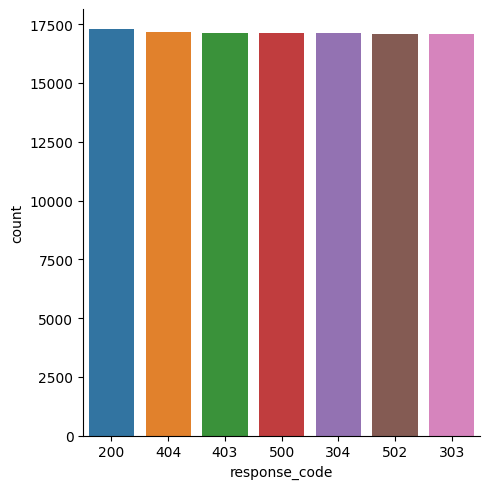

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.catplot(x='response_code', y='count', data=status_freq_pd_df, 
            kind='bar', order=status_freq_pd_df['response_code'])

The response code looks normalized so no need to use log on count cloumn

In [26]:
log_freq_df = response_freq_df.withColumn('log(count)', F.log(response_freq_df['count']))
log_freq_df.show()

+-------------+-----+-----------------+
|response_code|count|       log(count)|
+-------------+-----+-----------------+
|          200|17284|9.757536497051824|
|          303|17065|9.744784861340808|
|          304|17131|9.748644966730458|
|          403|17135| 9.74887843430871|
|          404|17173|9.751093661983862|
|          500|17133|9.748761707332973|
|          502|17079|9.745604917619191|
+-------------+-----+-----------------+



# Response Code Logarithm Count Graphical Analysis

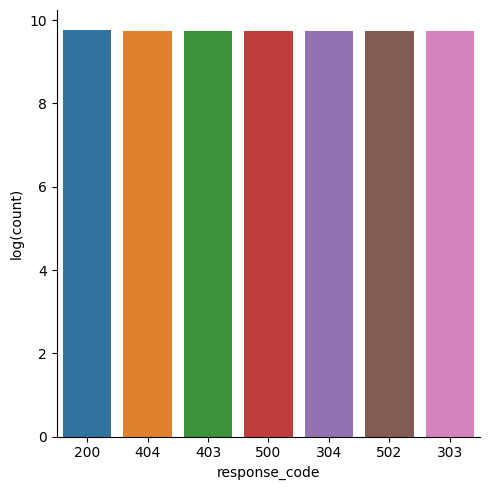

In [27]:
log_freq_pd_df = (log_freq_df
                    .toPandas()
                    .sort_values(by=['log(count)'],
                                 ascending=False))
sns.catplot(x='response_code', y='log(count)', data=log_freq_pd_df, 
            kind='bar', order=status_freq_pd_df['response_code'])

As said the dataset is perfectly balanced in the graph

# 404 Response Codes Analysis

In [28]:
not_found_df = logs_df.filter(logs_df["response_code"] == 404).cache()
print(('Total 404 responses: {}').format(not_found_df.count()))

Total 404 responses: 17173


# Top Ten 404 Response codes API

In [29]:
top10_404_count_df = (not_found_df
                          .groupBy("endpoint")
                          .count()
                          .sort("count", ascending=False)
                          .limit(10))

top10_404_count_df.show(truncate=False)

+---------------------------------------------------------------------------------+-----+
|endpoint                                                                         |count|
+---------------------------------------------------------------------------------+-----+
|/Archives/edgar/data/0001179929/000117992923000043/moh-20230320_g24.jpg          |141  |
|/Archives/edgar/data/1390098/000121390023023295/0001213900-23-023295.txt         |139  |
|/Archives/edgar/data/0001002638/000100263815000016/0001002638-15-000016-index.htm|139  |
|/Archives/edgar/data/0001724128/000121390021017151/s131120_10k.htm               |138  |
|/Archives/edgar/data/0001798682/000121390021017167/s131143_10k.htm               |138  |
|/Archives/edgar/data/0001260125/000114420419015093/tv516458_10k.htm              |138  |
|/Archives/edgar/data/27419/0001104659-12-037689.txt                              |138  |
|/Archives/edgar/data/0000205007/000114554923005581/primary_doc.xml               |136  |
|/Archives

Host names of Top Ten 404 Response code API

In [30]:
host_404_count_df = (not_found_df
                          .groupBy("ip_address")
                          .count()
                          .sort("count", ascending=False)
                          .limit(10))

host_404_count_df.show(truncate=False)

+--------------+-----+
|ip_address    |count|
+--------------+-----+
|211.192.19.243|1    |
|203.239.62.214|1    |
|57.99.6.85    |1    |
|170.110.43.62 |1    |
|113.168.71.233|1    |
|17.124.63.123 |1    |
|166.80.39.27  |1    |
|92.213.198.148|1    |
|221.135.7.230 |1    |
|73.69.108.205 |1    |
+--------------+-----+



# Hourly 404 Response codes

In [31]:
hourly_404 = (not_found_df
                                   .groupBy('hour')
                                   .count()
                                   .sort('hour'))
hourly_404 = hourly_404.toPandas()
hourly_404

,hour,count
0,,17173


As there is no hour data, All of them appear on 0th hour i.e start of the day

# Daily 404 Response codes

In [32]:
daily_404 = (not_found_df
                                .groupBy("date")
                                .count()
                                .sort("date"))

daily_404 = daily_404.toPandas()
daily_404

,date,count
0,2118-12-26,17173


All of them are of same date

# Weekly 404 Response codes

In [33]:
from pyspark.sql.functions import col

weekly_404 = not_found_df.groupBy('day_of_week').count().orderBy(col('count').asc())
weekly_404.show()

+-----------+-----+
|day_of_week|count|
+-----------+-----+
|     Monday|17173|
+-----------+-----+



404 Appears only on Monday



# 200 Response Codes Analysis

In [34]:
success_df = logs_df.filter(logs_df["response_code"] == 200).cache()
print(('Total 200 responses: {}').format(success_df.count()))

Total 200 responses: 17284


# Top Ten 200 Response code API's

In [35]:
top10_200_count_df = (success_df
                          .groupBy("endpoint")
                          .count()
                          .sort("count", ascending=False)
                          .limit(10))

top10_200_count_df.show(truncate=False)

+---------------------------------------------------------------------------+-----+
|endpoint                                                                   |count|
+---------------------------------------------------------------------------+-----+
|/Archives/edgar/data/0001168220/000116822009000023/form10k-a_123108.htm    |152  |
|/Archives/edgar/data/0001091667/000109166722000024/chtr-20211231.htm       |141  |
|/Archives/edgar/data/27673/0001104659-12-037692.txt                        |141  |
|/Archives/edgar/data/0000004281/000119312517062657/R96.htm                 |139  |
|/Archives/edgar/data/0000205007/000114554923015369/0001145549-23-015369.txt|137  |
|/Archives/edgar/data/1826671/000121390023023294/0001213900-23-023294.txt   |137  |
|/Archives/edgar/data/0001760283/000121390021017155/s131124_10k.htm         |136  |
|/Archives/edgar/data/925548/000092153005000094/0000921530-05-000094.txt    |135  |
|/Archives/edgar/data/0001260125/000114420419015071/0001144204-19-015071.txt

# Top Ten 200 Response code Hosts

In [36]:
host_200_count_df = (success_df
                          .groupBy("ip_address")
                          .count()
                          .sort("count", ascending=False)
                          .limit(10))

host_200_count_df.show(truncate=False)

+--------------+-----+
|ip_address    |count|
+--------------+-----+
|200.235.72.159|1    |
|181.62.14.189 |1    |
|37.3.220.78   |1    |
|119.140.89.180|1    |
|84.106.114.163|1    |
|169.65.170.125|1    |
|116.15.217.208|1    |
|55.58.138.209 |1    |
|37.197.57.106 |1    |
|104.0.40.147  |1    |
+--------------+-----+



# Hourly 200 Response Codes

In [37]:
hourly_200 = (success_df
                                   .groupBy('hour')
                                   .count()
                                   .sort('hour'))
hourly_200 = hourly_200.toPandas()
hourly_200

,hour,count
0,,17284


# Daily 200 Response Codes

In [38]:
daily_200 = (success_df
                                .groupBy("date")
                                .count()
                                .sort("date"))

daily_200 = daily_200.toPandas()
daily_200

,date,count
0,2118-12-26,17284


# Weekly 200 Response Codes

In [39]:
weekly_200 = success_df.groupBy('day_of_week').count().orderBy(col('count').asc())
weekly_200.show()

+-----------+-----+
|day_of_week|count|
+-----------+-----+
|     Monday|17284|
+-----------+-----+



## Analyzing Frequent Hosts
Get the count of total accesses by each `host` and then sort by the counts and display only the top ten most frequent hosts.

In [40]:
host_sum_df =(logs_df
               .groupBy('ip_address')
               .count()
               .sort('count', ascending=False).limit(10))

host_sum_df.show(truncate=False)

+---------------+-----+
|ip_address     |count|
+---------------+-----+
|55.135.36.93   |2    |
|136.107.117.116|2    |
|99.46.28.107   |1    |
|163.218.128.230|1    |
|211.192.19.243 |1    |
|164.21.58.62   |1    |
|3.20.196.136   |1    |
|21.51.229.253  |1    |
|200.235.72.159 |1    |
|55.134.128.41  |1    |
+---------------+-----+



In [41]:
host_sum_pd_df = host_sum_df.toPandas()
host_sum_pd_df.iloc[8]['ip_address']

'200.235.72.159'

Note: check for potentially empty strings when data wrangling.


# Unique IP Address

In [42]:
unique_ip_address_count = (logs_df
                     .select('ip_address')
                     .distinct()
                     .count())
unique_ip_address_count

119998

# Display the Top 20 Frequent EndPoints
The number of hits to endpoints (URIs) in the log.

Group by the endpoint column, aggregate by count,
sort in descending order like the previous part.

In [43]:
paths_df = (logs_df
            .groupBy('endpoint')
            .count()
            .sort('count', ascending=False).limit(20))
paths_df.show()

+--------------------+-----+
|            endpoint|count|
+--------------------+-----+
|/Archives/edgar/d...|  863|
|/Archives/edgar/d...|  861|
|/Archives/edgar/d...|  853|
|/Archives/edgar/d...|  853|
|/Archives/edgar/d...|  852|
|/Archives/edgar/d...|  851|
|/Archives/edgar/d...|  850|
|/Archives/edgar/d...|  850|
|/Archives/edgar/d...|  847|
|/Archives/edgar/d...|  846|
|/Archives/edgar/d...|  842|
|/Archives/edgar/d...|  842|
|/Archives/edgar/d...|  840|
|/Archives/edgar/d...|  839|
|/Archives/edgar/d...|  839|
|/Archives/edgar/d...|  835|
|/Archives/edgar/d...|  834|
|/Archives/edgar/d...|  833|
|/Archives/edgar/d...|  833|
|/Archives/edgar/d...|  831|
+--------------------+-----+



# Top Ten Not Success (Error) Endpoints

In [44]:
error_df = (logs_df
               .filter(logs_df['response_code'] != 200))

error_df = (error_df
                               .groupBy('endpoint')
                               .count()
                               .sort('count', ascending=False)
                               .limit(10)
                          )
error_df.show()

+--------------------+-----+
|            endpoint|count|
+--------------------+-----+
|/Archives/edgar/d...|  746|
|/Archives/edgar/d...|  743|
|/Archives/edgar/d...|  739|
|/Archives/edgar/d...|  736|
|/Archives/edgar/d...|  734|
|/Archives/edgar/d...|  732|
|/Archives/edgar/d...|  732|
|/Archives/edgar/d...|  730|
|/Archives/edgar/d...|  727|
|/Archives/edgar/d...|  727|
+--------------------+-----+



## Number of Unique Daily Hosts


In [45]:
host_day_distinct_df = logs_df.select(logs_df.ip_address,'date').dropDuplicates()
host_day_distinct_df.show(5, truncate=False)

+---------------+----------+
|ip_address     |date      |
+---------------+----------+
|192.122.247.200|2118-12-26|
|213.85.74.116  |2118-12-26|
|70.129.148.146 |2118-12-26|
|5.103.107.227  |2118-12-26|
|182.67.59.24   |2118-12-26|
+---------------+----------+
only showing top 5 rows



All of hosts on single date

## Average Number of Daily Requests per Host
- DataFrame sorted by increasing day of the month which includes the day of the month 
- the associated number of average requests made for that day per Host. 

In [46]:
daily_hosts_df = (host_day_distinct_df
                     .groupBy('date')
                     .count()
                     .select(col('date'), 
                                      col("count").alias("total_hosts")))

total_daily_reqests_df = (logs_df
                              .select("date")
                              .groupBy('date')
                              .count()
                              .select(col("date"), 
                                      col("count").alias("total_reqs")))

avg_daily_reqests_per_host_df = total_daily_reqests_df.join(daily_hosts_df, 'date')
avg_daily_reqests_per_host_df = (avg_daily_reqests_per_host_df
                                    .withColumn('avg_reqs', col('total_reqs') / col('total_hosts'))
                                    .sort("date"))
avg_daily_reqests_per_host_df = avg_daily_reqests_per_host_df.toPandas()
avg_daily_reqests_per_host_df

,date,total_reqs,total_hosts,avg_reqs
0,2118-12-26,120000,119998,1.000017


### Endpoint that received the highest number of invocations on a specific day of the week

Calculating the count of invocations for each unique combination of day of the week and endpoint

In [47]:
from pyspark.sql.functions import date_format, count, max
# Group the data by day of the week and endpoint, and count the number of invocations
grouped_df = logs_df.groupBy('day_of_week', 'endpoint').agg(count('*').alias('invocations'))
grouped_df.show(10, truncate=True)


+-----------+--------------------+-----------+
|day_of_week|            endpoint|invocations|
+-----------+--------------------+-----------+
|     Monday|/Archives/edgar/d...|        811|
|     Monday|/Archives/edgar/d...|        800|
|     Monday|/Archives/edgar/d...|        850|
|     Monday|/Archives/edgar/d...|        805|
|     Monday|/Archives/edgar/d...|        758|
|     Monday|/Archives/edgar/d...|        806|
|     Monday|/Archives/edgar/d...|        815|
|     Monday|/Archives/edgar/d...|        787|
|     Monday|/Archives/edgar/d...|        786|
|     Monday|/Archives/edgar/d...|        782|
+-----------+--------------------+-----------+
only showing top 10 rows



Select the highest count for each unique day of week

In [48]:
# Avoids the join operation. 
# Utilize window functions to rank the rows and directly filter the rows with the highest invocations.
# This can be advantageous when dealing with large datasets since it avoids the overhead of the join operation.

from pyspark.sql.functions import row_number
from pyspark.sql.window import Window

# Add a row number column based on the invocations in descending order for each day_of_week
windowSpec = Window.partitionBy('day_of_week').orderBy(grouped_df['invocations'].desc())
ranked_df = grouped_df.withColumn('rank', row_number().over(windowSpec))

# Filter the ranked DataFrame to retain only the rows with rank 1 (highest invocations)
max_invocations_df = ranked_df.filter(ranked_df['rank'] == 1)

# Summarize the results and display the day_of_week, endpoint, and invocations with max invocations
max_invocations_df.select('day_of_week', 'endpoint', 'invocations').show()

+-----------+--------------------+-----------+
|day_of_week|            endpoint|invocations|
+-----------+--------------------+-----------+
|     Monday|/Archives/edgar/d...|        863|
+-----------+--------------------+-----------+



Everything on Monday

## Method Analysis

### Analyzing Frequent Methods

In [49]:
methods_count =(logs_df
               .groupBy('method')
               .count()
               .sort('count', ascending=False))

methods_count.show(truncate=False)

+------+-----+
|method|count|
+------+-----+
|DELETE|30074|
|POST  |30067|
|GET   |29957|
|PUT   |29902|
+------+-----+



<ipython-input-50-795e906768a3>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(methods, rotation=45)


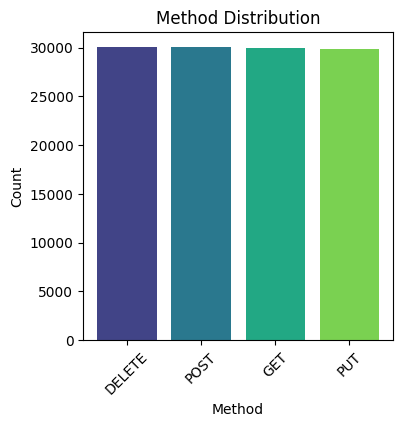

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the method names and counts from the DataFrame
methods = methods_count.select('method').rdd.flatMap(lambda x: x).collect()
counts = methods_count.select('count').rdd.flatMap(lambda x: x).collect()

colors = sns.color_palette('viridis', len(methods))
fig, ax = plt.subplots(figsize=(4, 4))
ax.bar(methods, counts, color=colors)
ax.set_xlabel('Method')
ax.set_ylabel('Count')
ax.set_title('Method Distribution')
ax.set_xticklabels(methods, rotation=45)

# Display the plot
plt.show()


In [51]:
grouped_df = logs_df.groupBy('response_code', 'method').count()
grouped_df.show(truncate=False)

+-------------+------+-----+
|response_code|method|count|
+-------------+------+-----+
|502          |DELETE|4265 |
|200          |GET   |4359 |
|403          |GET   |4336 |
|403          |DELETE|4349 |
|404          |PUT   |4339 |
|303          |GET   |4237 |
|200          |PUT   |4295 |
|502          |PUT   |4334 |
|502          |POST  |4298 |
|304          |POST  |4277 |
|404          |GET   |4158 |
|304          |GET   |4327 |
|502          |GET   |4182 |
|200          |DELETE|4383 |
|303          |POST  |4281 |
|404          |DELETE|4280 |
|303          |PUT   |4268 |
|500          |POST  |4278 |
|304          |DELETE|4275 |
|304          |PUT   |4252 |
+-------------+------+-----+
only showing top 20 rows



In [52]:
from pyspark.sql import functions as F

grouped_df = logs_df.groupBy('endpoint', 'method').count()
grouped_df.show(truncate=False)

+---------------------------------------------------------------------------------+------+-----+
|endpoint                                                                         |method|count|
+---------------------------------------------------------------------------------+------+-----+
|/Archives/edgar/data/0001439124/000129281422000788/                              |GET   |198  |
|/Archives/edgar/data/1932485/000110465923037622/tm239175d10_absee.htm            |GET   |178  |
|/Archives/edgar/data/0001035018/000119312507272779/g47607g69u06.jpg              |DELETE|182  |
|/Archives/edgar/data/0001729361/000121390021017176/s131100_10k.htm               |GET   |211  |
|/Archives/edgar/data/0000205007/000114554923005581/0001145549-23-005581.txt      |PUT   |190  |
|/Archives/edgar/data/0000004281/000119312517062657/R98.htm                       |PUT   |192  |
|/Archives/edgar/data/0001129068/000095013122003743/narot19cabsee_0818-1508.htm   |DELETE|193  |
|/Archives/edgar/data/24104/00

# Clustering

Data Preprocessing

In [53]:
logs_df.show()

+---------------+----+-----+---+----+------+------+--------------------+------------+-------------+-----+---------+----------+-----------+
|     ip_address|year|month|day|hour|minute|method|            endpoint|http_version|response_code|bytes|month_num|      date|day_of_week|
+---------------+----+-----+---+----+------+------+--------------------+------------+-------------+-----+---------+----------+-----------+
|   75.77.74.150|2118|  Dec| 26|    |      |   GET|/Archives/edgar/d...|         1.0|          200| 5302|       12|2118-12-26|     Monday|
|  176.120.174.1|2118|  Dec| 26|    |      |  POST|/Archives/edgar/d...|         1.0|          500|34727|       12|2118-12-26|     Monday|
| 162.200.34.120|2118|  Dec| 26|    |      |  POST|/Archives/edgar/d...|         1.0|          403|25428|       12|2118-12-26|     Monday|
| 133.224.84.239|2118|  Dec| 26|    |      |   GET|/Archives/edgar/d...|         1.0|          304|27248|       12|2118-12-26|     Monday|
| 211.239.196.64|2118|  Dec

# Drop Null values

In [54]:
logs_df = logs_df.na.drop()
logs_df.show()

+---------------+----+-----+---+----+------+------+--------------------+------------+-------------+-----+---------+----------+-----------+
|     ip_address|year|month|day|hour|minute|method|            endpoint|http_version|response_code|bytes|month_num|      date|day_of_week|
+---------------+----+-----+---+----+------+------+--------------------+------------+-------------+-----+---------+----------+-----------+
|   75.77.74.150|2118|  Dec| 26|    |      |   GET|/Archives/edgar/d...|         1.0|          200| 5302|       12|2118-12-26|     Monday|
|  176.120.174.1|2118|  Dec| 26|    |      |  POST|/Archives/edgar/d...|         1.0|          500|34727|       12|2118-12-26|     Monday|
| 162.200.34.120|2118|  Dec| 26|    |      |  POST|/Archives/edgar/d...|         1.0|          403|25428|       12|2118-12-26|     Monday|
| 133.224.84.239|2118|  Dec| 26|    |      |   GET|/Archives/edgar/d...|         1.0|          304|27248|       12|2118-12-26|     Monday|
| 211.239.196.64|2118|  Dec

# As we can see that we have only one Day, Month and Year throughout the logs so drop them

In [55]:
logs_df = logs_df.drop('month')
logs_df = logs_df.drop('day')
logs_df = logs_df.drop('year')

logs_df.show()

+---------------+----+------+------+--------------------+------------+-------------+-----+---------+----------+-----------+
|     ip_address|hour|minute|method|            endpoint|http_version|response_code|bytes|month_num|      date|day_of_week|
+---------------+----+------+------+--------------------+------------+-------------+-----+---------+----------+-----------+
|   75.77.74.150|    |      |   GET|/Archives/edgar/d...|         1.0|          200| 5302|       12|2118-12-26|     Monday|
|  176.120.174.1|    |      |  POST|/Archives/edgar/d...|         1.0|          500|34727|       12|2118-12-26|     Monday|
| 162.200.34.120|    |      |  POST|/Archives/edgar/d...|         1.0|          403|25428|       12|2118-12-26|     Monday|
| 133.224.84.239|    |      |   GET|/Archives/edgar/d...|         1.0|          304|27248|       12|2118-12-26|     Monday|
| 211.239.196.64|    |      |   GET|/Archives/edgar/d...|         1.0|          200|32034|       12|2118-12-26|     Monday|
| 152.15

# We dont have hour and minute data so drop them

In [56]:
logs_df = logs_df.drop('hour')
logs_df = logs_df.drop('minute')

logs_df.show()

+---------------+------+--------------------+------------+-------------+-----+---------+----------+-----------+
|     ip_address|method|            endpoint|http_version|response_code|bytes|month_num|      date|day_of_week|
+---------------+------+--------------------+------------+-------------+-----+---------+----------+-----------+
|   75.77.74.150|   GET|/Archives/edgar/d...|         1.0|          200| 5302|       12|2118-12-26|     Monday|
|  176.120.174.1|  POST|/Archives/edgar/d...|         1.0|          500|34727|       12|2118-12-26|     Monday|
| 162.200.34.120|  POST|/Archives/edgar/d...|         1.0|          403|25428|       12|2118-12-26|     Monday|
| 133.224.84.239|   GET|/Archives/edgar/d...|         1.0|          304|27248|       12|2118-12-26|     Monday|
| 211.239.196.64|   GET|/Archives/edgar/d...|         1.0|          200|32034|       12|2118-12-26|     Monday|
| 152.154.66.105|   GET|/Archives/edgar/d...|         1.0|          200|43782|       12|2118-12-26|     

In [ ]:
logs_df.select('http_version').distinct().collect()

# Since there is only one HTTP version 1.0 drop the column

In [57]:
logs_df = logs_df.drop('http_version')

logs_df.show()

+---------------+------+--------------------+-------------+-----+---------+----------+-----------+
|     ip_address|method|            endpoint|response_code|bytes|month_num|      date|day_of_week|
+---------------+------+--------------------+-------------+-----+---------+----------+-----------+
|   75.77.74.150|   GET|/Archives/edgar/d...|          200| 5302|       12|2118-12-26|     Monday|
|  176.120.174.1|  POST|/Archives/edgar/d...|          500|34727|       12|2118-12-26|     Monday|
| 162.200.34.120|  POST|/Archives/edgar/d...|          403|25428|       12|2118-12-26|     Monday|
| 133.224.84.239|   GET|/Archives/edgar/d...|          304|27248|       12|2118-12-26|     Monday|
| 211.239.196.64|   GET|/Archives/edgar/d...|          200|32034|       12|2118-12-26|     Monday|
| 152.154.66.105|   GET|/Archives/edgar/d...|          200|43782|       12|2118-12-26|     Monday|
|  41.76.166.189|   PUT|/Archives/edgar/d...|          304|53533|       12|2118-12-26|     Monday|
|  134.27.

In [59]:
logs_df.select('month_num').distinct().collect()
logs_df.select('date').distinct().collect()
logs_df.select('day_of_week').distinct().collect()

[Row(day_of_week='Monday')]

# No need of month_num, date and day_of_week columns as all have same value, so drop them

In [60]:
logs_df = logs_df.drop('month_num')
logs_df = logs_df.drop('date')
logs_df = logs_df.drop('day_of_week')

logs_df.show()

+---------------+------+--------------------+-------------+-----+
|     ip_address|method|            endpoint|response_code|bytes|
+---------------+------+--------------------+-------------+-----+
|   75.77.74.150|   GET|/Archives/edgar/d...|          200| 5302|
|  176.120.174.1|  POST|/Archives/edgar/d...|          500|34727|
| 162.200.34.120|  POST|/Archives/edgar/d...|          403|25428|
| 133.224.84.239|   GET|/Archives/edgar/d...|          304|27248|
| 211.239.196.64|   GET|/Archives/edgar/d...|          200|32034|
| 152.154.66.105|   GET|/Archives/edgar/d...|          200|43782|
|  41.76.166.189|   PUT|/Archives/edgar/d...|          304|53533|
|  134.27.187.18|  POST|/Archives/edgar/d...|          404|15445|
|   152.77.55.45|   PUT|/Archives/edgar/d...|          200|44416|
|115.252.123.132|  POST|/Archives/edgar/d...|          500|11453|
|  155.58.151.29|   GET|/Archives/edgar/d...|          502| 7442|
|   13.79.113.61|  POST|/Archives/edgar/d...|          404|10734|
|  88.193.

# Apply StringIndexer to Transform the columns to meaningful values

In [61]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

# Apply StringIndexer on ip, method, endpoint columns to convert them from string to number
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(logs_df) for column in list(set(logs_df.columns)-set(['bytes', 'response_code'])) ]

pipeline = Pipeline(stages=indexers)
transformed_df = pipeline.fit(logs_df).transform(logs_df)

transformed_df.show()

+---------------+------+--------------------+-------------+-----+------------+--------------+----------------+
|     ip_address|method|            endpoint|response_code|bytes|method_index|endpoint_index|ip_address_index|
+---------------+------+--------------------+-------------+-----+------------+--------------+----------------+
|   75.77.74.150|   GET|/Archives/edgar/d...|          200| 5302|         2.0|          58.0|        106035.0|
|  176.120.174.1|  POST|/Archives/edgar/d...|          500|34727|         1.0|          78.0|         45226.0|
| 162.200.34.120|  POST|/Archives/edgar/d...|          403|25428|         1.0|          36.0|         37252.0|
| 133.224.84.239|   GET|/Archives/edgar/d...|          304|27248|         2.0|          95.0|         20067.0|
| 211.239.196.64|   GET|/Archives/edgar/d...|          200|32034|         2.0|          80.0|         67278.0|
| 152.154.66.105|   GET|/Archives/edgar/d...|          200|43782|         2.0|          33.0|         31196.0|
|

# All desired columns are numerical, convert them into features using a Vector Assembler

In [62]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import DoubleType

# Type cast 'response_code' and 'bytes' to double as other columns are of same type
transformed_df = transformed_df.withColumn('response_code', col('response_code').cast(DoubleType()))
transformed_df = transformed_df.withColumn('bytes', col('bytes').cast(DoubleType()))

assemble = VectorAssembler(inputCols=['response_code', 'bytes', 'ip_address_index', 'endpoint_index', 'method_index'], outputCol='features')
assembled_df = assemble.transform(transformed_df)
assembled_df.show()

+---------------+------+--------------------+-------------+-------+------------+--------------+----------------+--------------------+
|     ip_address|method|            endpoint|response_code|  bytes|method_index|endpoint_index|ip_address_index|            features|
+---------------+------+--------------------+-------------+-------+------------+--------------+----------------+--------------------+
|   75.77.74.150|   GET|/Archives/edgar/d...|        200.0| 5302.0|         2.0|          58.0|        106035.0|[200.0,5302.0,106...|
|  176.120.174.1|  POST|/Archives/edgar/d...|        500.0|34727.0|         1.0|          78.0|         45226.0|[500.0,34727.0,45...|
| 162.200.34.120|  POST|/Archives/edgar/d...|        403.0|25428.0|         1.0|          36.0|         37252.0|[403.0,25428.0,37...|
| 133.224.84.239|   GET|/Archives/edgar/d...|        304.0|27248.0|         2.0|          95.0|         20067.0|[304.0,27248.0,20...|
| 211.239.196.64|   GET|/Archives/edgar/d...|        200.0|320

# Now that all columns are transformed into a single feature vector we need to standardize the data to bring them to a comparable scale

In [63]:
from pyspark.ml.feature import StandardScaler

scale = StandardScaler(inputCol='features', outputCol='standardized')
data_scale = scale.fit(assembled_df)
data_scale_output = data_scale.transform(assembled_df)
data_scale_output.show()

+---------------+------+--------------------+-------------+-------+------------+--------------+----------------+--------------------+--------------------+
|     ip_address|method|            endpoint|response_code|  bytes|method_index|endpoint_index|ip_address_index|            features|        standardized|
+---------------+------+--------------------+-------------+-------+------------+--------------+----------------+--------------------+--------------------+
|   75.77.74.150|   GET|/Archives/edgar/d...|        200.0| 5302.0|         2.0|          58.0|        106035.0|[200.0,5302.0,106...|[1.94033947218411...|
|  176.120.174.1|  POST|/Archives/edgar/d...|        500.0|34727.0|         1.0|          78.0|         45226.0|[500.0,34727.0,45...|[4.85084868046027...|
| 162.200.34.120|  POST|/Archives/edgar/d...|        403.0|25428.0|         1.0|          36.0|         37252.0|[403.0,25428.0,37...|[3.90978403645098...|
| 133.224.84.239|   GET|/Archives/edgar/d...|        304.0|27248.0|   

In [64]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_score=[]
distortion = []
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    KMeans_algo = KMeans(featuresCol='standardized', k=i)
    KMeans_fit = KMeans_algo.fit(data_scale_output)
    output_1 = KMeans_fit.transform(data_scale_output)

    distortion.append(KMeans_fit.summary.trainingCost)

    score=evaluator.evaluate(output_1)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:", score)

Silhouette Score: 0.2495137083331556
Silhouette Score: 0.2327364493127622
Silhouette Score: 0.2438655083028723
Silhouette Score: 0.2482502024076914
Silhouette Score: 0.2542352160099689
Silhouette Score: 0.2543006105946551
Silhouette Score: 0.2579115680285268
Silhouette Score: 0.2663829109542886


# Visualizing the silhouette scores in a plot

Text(0, 0.5, 'cost')

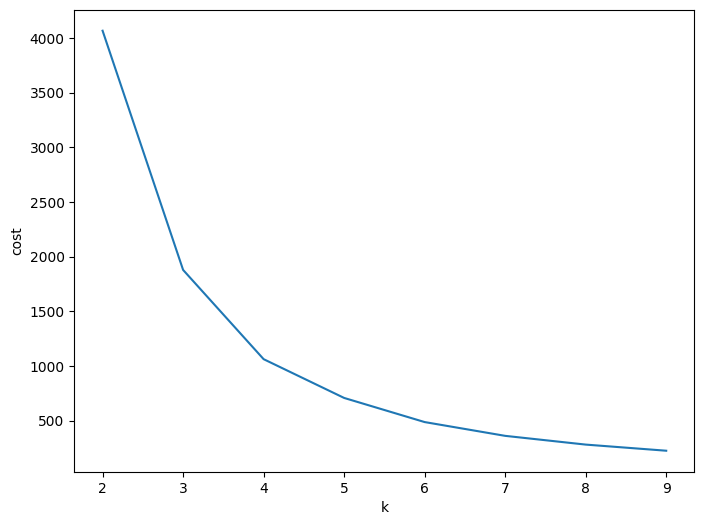

In [82]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize =(8,6))
ax.plot(range(2,10), distortion)
ax.set_xlabel('k')
ax.set_ylabel('cost')

# The Elbow is at 4 so K=4 gives optimal cluster

# Normalizing values

In [66]:
from pyspark.ml.feature import Normalizer

l1_norm = Normalizer().setP(1).setInputCol("features").setOutputCol("l1_norm")
normalized_df = l1_norm.transform(assembled_df)
normalized_df.show()

+---------------+------+--------------------+-------------+-------+------------+--------------+----------------+--------------------+--------------------+
|     ip_address|method|            endpoint|response_code|  bytes|method_index|endpoint_index|ip_address_index|            features|             l1_norm|
+---------------+------+--------------------+-------------+-------+------------+--------------+----------------+--------------------+--------------------+
|   75.77.74.150|   GET|/Archives/edgar/d...|        200.0| 5302.0|         2.0|          58.0|        106035.0|[200.0,5302.0,106...|[0.00179216287176...|
|  176.120.174.1|  POST|/Archives/edgar/d...|        500.0|34727.0|         1.0|          78.0|         45226.0|[500.0,34727.0,45...|[0.00620871206476...|
| 162.200.34.120|  POST|/Archives/edgar/d...|        403.0|25428.0|         1.0|          36.0|         37252.0|[403.0,25428.0,37...|[0.00638466413181...|
| 133.224.84.239|   GET|/Archives/edgar/d...|        304.0|27248.0|   

In [67]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_score=[]
distortion = []
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='l1_norm', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    KMeans_algo = KMeans(featuresCol='l1_norm', k=i)
    KMeans_fit = KMeans_algo.fit(normalized_df)
    output = KMeans_fit.transform(normalized_df)

    distortion.append(KMeans_fit.summary.trainingCost)

    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:", score)

Silhouette Score: 0.764989644333913
Silhouette Score: 0.7197068203717747
Silhouette Score: 0.7182825477911833
Silhouette Score: 0.698355445191042
Silhouette Score: 0.6995737686035479
Silhouette Score: 0.6976980204583906
Silhouette Score: 0.6878771293964626
Silhouette Score: 0.6858259154273475


In [68]:
output.agg({"prediction": "avg"}).collect()[0]

Row(avg(prediction)=4.118508333333334)

# Visualizing the silhouette scores in a plot

Text(0, 0.5, 'cost')

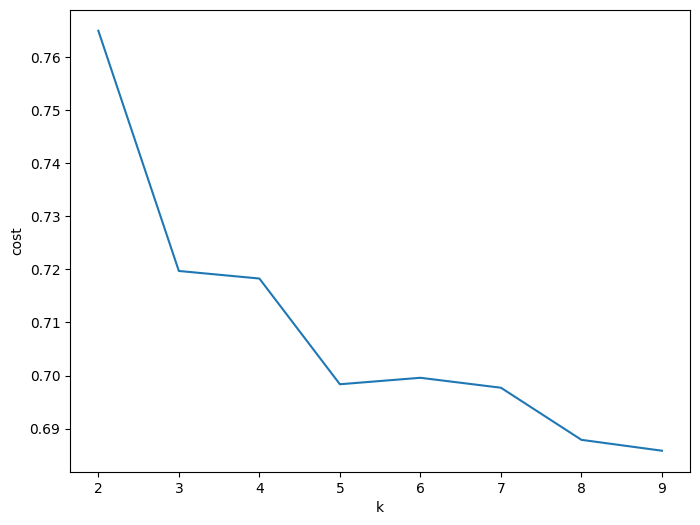

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize =(8,6))
ax.plot(range(2,10), silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

The first local maxima gives the value of optimal cluster i.e 4

In [87]:
KMeans_algo = KMeans(featuresCol='standardized', k=4)
KMeans_fit = KMeans_algo.fit(data_scale_output)
output = KMeans_fit.transform(data_scale_output)

output.show()

+---------------+------+--------------------+-------------+-------+------------+--------------+----------------+--------------------+--------------------+----------+
|     ip_address|method|            endpoint|response_code|  bytes|method_index|endpoint_index|ip_address_index|            features|        standardized|prediction|
+---------------+------+--------------------+-------------+-------+------------+--------------+----------------+--------------------+--------------------+----------+
|   75.77.74.150|   GET|/Archives/edgar/d...|        200.0| 5302.0|         2.0|          58.0|        106035.0|[200.0,5302.0,106...|[1.94033947218411...|         0|
|  176.120.174.1|  POST|/Archives/edgar/d...|        500.0|34727.0|         1.0|          78.0|         45226.0|[500.0,34727.0,45...|[4.85084868046027...|         2|
| 162.200.34.120|  POST|/Archives/edgar/d...|        403.0|25428.0|         1.0|          36.0|         37252.0|[403.0,25428.0,37...|[3.90978403645098...|         3|
| 13

In [88]:
cluster_centers = KMeans_fit.clusterCenters()
print("Cluster Centers:")
for center in cluster_centers:
    print(center)

Cluster Centers:
[3.5988179  1.765699   2.67834275 1.61208535 2.17780021]
[3.65357431 1.68108226 0.78019812 1.73638456 2.16011274]
[3.61320607 1.75229789 1.79454545 2.65790807 0.52871809]
[3.62779075 1.71889663 1.69123562 0.76372223 0.50598116]


In [89]:
distinct_pred = output.select("prediction").distinct()
distinct_pred.show()

+----------+
|prediction|
+----------+
|         1|
|         3|
|         2|
|         0|
+----------+



# Clustering Visualization

In [90]:
grouped_df = output.groupBy("prediction").count()
grouped_df.toPandas()

,prediction,count
0,1,30141
1,3,30456
2,2,29809
3,0,29594


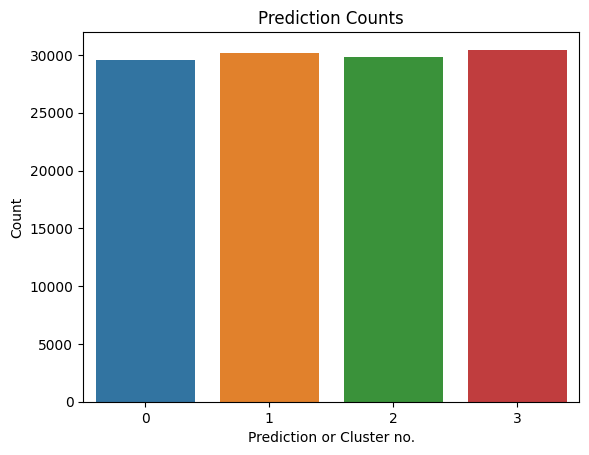

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the prediction column from the DataFrame
prediction_counts = output.groupBy("prediction").count()

# Convert the DataFrame to Pandas for plotting
prediction_counts_pd = prediction_counts.toPandas()

# Plot the prediction counts using sns
sns.barplot(data=prediction_counts_pd, x="prediction", y="count")
plt.xlabel("Prediction or Cluster no.")
plt.ylabel("Count")
plt.title("Prediction Counts")
plt.show()

# Grouping together predictions of clusters and API methods

In [94]:
pred_method = output.groupBy('prediction', 'method').count().orderBy(col('method')).orderBy(col('prediction'))
pred_method.show()

+----------+------+-----+
|prediction|method|count|
+----------+------+-----+
|         0|   PUT|15010|
|         0|  POST| 2133|
|         0|   GET|12451|
|         1|  POST| 2405|
|         1|   PUT|14892|
|         1|   GET|12844|
|         2|  POST|12618|
|         2|   GET| 2573|
|         2|DELETE|14618|
|         3|DELETE|15456|
|         3|  POST|12911|
|         3|   GET| 2089|
+----------+------+-----+



# Grouping together predictions of clusters and API response codes

In [95]:
pred_res = output.groupBy('prediction', 'response_code').count().orderBy(col('response_code')).orderBy(col('prediction'))
pred_res.show()

+----------+-------------+-----+
|prediction|response_code|count|
+----------+-------------+-----+
|         0|        304.0| 4315|
|         0|        500.0| 4120|
|         0|        404.0| 4175|
|         0|        303.0| 4270|
|         0|        403.0| 4104|
|         0|        200.0| 4416|
|         0|        502.0| 4194|
|         1|        303.0| 4223|
|         1|        502.0| 4367|
|         1|        404.0| 4341|
|         1|        200.0| 4163|
|         1|        403.0| 4345|
|         1|        304.0| 4215|
|         1|        500.0| 4487|
|         2|        500.0| 4176|
|         2|        200.0| 4346|
|         2|        303.0| 4254|
|         2|        404.0| 4286|
|         2|        304.0| 4320|
|         2|        403.0| 4322|
+----------+-------------+-----+
only showing top 20 rows

